In [4]:
#Imports
import csv
import os
import glob
import json
import re
import string
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import scipy.linalg
from scipy import constants

#Matplotlib
import matplotlib.pyplot as plt

#SciKit
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score

#NLTK
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#Gensim
#import gensim
#from gensim.models import Word2Vec, KeyedVectors


In [19]:
#This code gets the number of folders in a folder. This will be more important once we have more data. - FIX

path = "./Tweet_Datasets/collections - #jailbait"


def count_folders(path):
 count = 0
 for folder in os.listdir(path):
   if os.path.isfile(os.path.join(path, folder)):
     count += 1
 return count


number_of_folders = count_folders(path)
print(number_of_folders)

109


In [ ]:
np.random.seed(500)

In [20]:
#This code iterates through the #jailbait .csv files and appends all entries to a csv file'

folderPath = r"./Tweet_Datasets/collections - #jailbait"
csvFiles = glob.glob(f"./Tweet_Datasets/collections - #jailbait/*.csv")
dataFrames = []
for file in csvFiles:
   df = pd.read_csv(file, encoding='latin-1')
   dataFrames.append(df)

corpus = pd.concat(dataFrames, ignore_index=True)
print(corpus.head())
corpus.to_csv(r'./all_tweets.csv', index=False)


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
#RUN CODE IN THIS SECTION TO RESET TOKENIZED_TWEETS

In [37]:
import csv
import os

file_path = 'corpus_combined.csv'  # Assuming 'corpus_combined.csv' is the file name

tweetText = []
tweetTime = []

if os.path.exists(file_path):
    with open(file_path, 'r', encoding='utf-8') as rf:
        csv_reader = csv.reader(rf, delimiter=',')
        for row in csv_reader:
            if len(row) >= 2:
                tweetTime.append(row[0])
                tweetText.append(row[1])
else:
    print(f"File not found: {file_path}")

print("Tweet Text:", tweetText)
print("Tweet Time:", tweetTime)

Tweet Text: ['text', 'RT @SelenasWankBank: And for the jailbait fans, Selena at 17. #SelenaGomez #bikini #teen #jailbait #tits #boobs #breasts https://t.co/Qo3MJâ\x80¦', "I'm 17... I'm jailbait", 'Florida breeds jailbait.', 'Jurina is really jailbait', 'Jacob Davies out on jailbait patrol', 'Jacob Davies out on jailbait patrol', 'I love when Jailbait teaches me new abbreviations. â\x98ºï¸\x8f', '@heartofhannah1 oh you and your jailbait better not start tonight !', 'Always a nice surprise to bump into @lukecotty of a morning. #JailBait', 'DAMN THOSE ARMS, HERCULES! \nHow old is this actor? Is it jailbait?\n\n#OnceUponATime', 'RT @TROLLGAWDD: JAILBAIT. \nWHATS THAT SPELL? \nCHILD PREDATOR CHARGES', 'cell-fie\nbecause jailbait\nlmfao https://t.co/meQXdPoA4b', 'RT @txdaddy70: Retweet if you like #jailbait https://t.co/XICxJ39Lhh', 'Dam. 14 tho \n#jailbait #wouldbeworthit https://t.co/oUPZrMdzaE', 'RT @MDelhome: #jailbait part 1 https://t.co/o4OxzhjDp9', 'WISHBONE ASH - Jailbait https://t.c

In [42]:
#This code implements a function that removes stopwords and punctuation and appends each tokenized Tweet to a list 'tokenized_tweets'
#I still need to decide how to clean punctuation from Tweets without cleaning hashtags.

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

def cleanText(tweet):
    # Replaces URLs with a special token
    tweet = re.sub(r'((www.\S+)|(https?://\S+))', '<URL>', tweet)
  
    # Removes the numbers from the text
    tweet = re.sub(r'[0-9]\S+', r'', tweet)
  
    # Removes tags from tweets except for hashtags
    tweet = re.sub(r'(@\S+)', r'', tweet)
  
    # Removes the punctuation from the text except for #
    tweet_without_punctuation = re.sub(r'[^#\w\s]', r'', tweet)
  
    # Sets stop words
    stop_words = set(stopwords.words("english"))
  
    # Removes the stop words from tweet
    tweet_without_stopwords = [word for word in 
                               tweet_without_punctuation.split()
                               if word.lower() not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tweet_without_stopwords]
    
    return lemmatized_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joeyholzman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/joeyholzman/nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/joeyholzman/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [43]:
tokenized_tweets = []

for i in range(0, len(tweetText)):
   tweet_tokens = cleanText(tweetText[i])
   tokenized_tweets.append(tweet_tokens)

In [44]:
#This code writes all tokenized Tweets and timestamps to a .json file.


with open('./Tweet_Datasets/Tokenized_Tweets/Tokenized_Tweets.json', 'w') as f:
   tweet_data = []
   for i in range(0, len(tokenized_tweets)):
       tweet_entry = {
           "TweetText": tweetText[i],
           "TokenizedTweet": tokenized_tweets[i],
           "Timestamp": tweetTime[i]
       }
       tweet_data.append(tweet_entry)

   json.dump(tweet_data, f, indent=6)

In [45]:
# Load data from Tokenized_Tweets.json
with open('./Tweet_Datasets/Tokenized_Tweets/Tokenized_Tweets.json', 'r') as f:
    tweet_data = json.load(f)

# Keep track of unique entries using a dictionary
unique_tweets = {}

# Iterate through the loaded data and remove duplicates based on TweetText
unique_tweet_data = []
for tweet_entry in tweet_data:
    tweet_text = tweet_entry["TweetText"]
    # Check if the tweet text is not already in the dictionary of unique tweets
    if tweet_text not in unique_tweets:
        unique_tweets[tweet_text] = tweet_entry
        unique_tweet_data.append(tweet_entry)

# Write unique entries back to Tokenized_Tweets.json
with open('./Tweet_Datasets/Tokenized_Tweets/Tokenized_Tweets.json', 'w') as f:
    json.dump(unique_tweet_data, f, indent=6)

In [ ]:
#DO NOT TOUCH CODE ABOVE THIS

In [18]:
#This code returns how many Tweets have been classified

def totalVerified():
   with open('./Tweet_Datasets/Tokenized_Tweets/Tokenized_Tweets.json') as data_file:
       data = json.load(data_file)
       total = 0
       for entry in data:
           if "Classification" in entry:
               total += 1
   return total

print("Total verified: " + str(totalVerified()))

Total verified: 346


In [19]:
#This code appends all classified Tweets to a Classified_Tweets .json file for safety


with open('./Tweet_Datasets/Tokenized_Tweets/Tokenized_Tweets.json') as data_file:
       data = json.load(data_file)

classified_tweets = []

for entry in data:
   if "Classification" in entry:
       classified_tweets.append(entry)

with open('./Tweet_Datasets/Classified_Tweets/Classified_Tweets.json', 'w') as f:
   json.dump(classified_tweets, f, indent=6)


/var/folders/97/pcrshgh166n68txwpwsjc2540000gn/T/ipykernel_71621/142736166.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=classifications, palette="dark", edgecolor=".6")


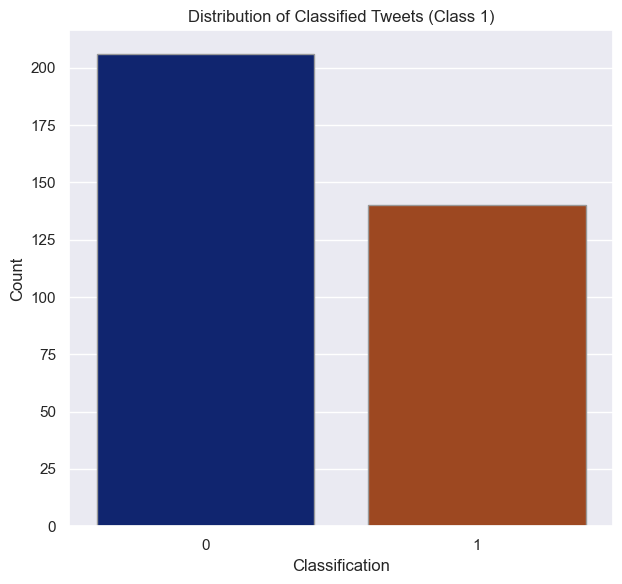

In [20]:
#This code creates a data visualization of currently classified Tweets
#Uses the matplotlib library


with open('./Tweet_Datasets/Classified_Tweets/Classified_Tweets.json') as f:
   classified_tweets = json.load(f)

classifications = [entry["Classification"] for entry in classified_tweets]

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
sns.countplot(x=classifications, palette="dark", edgecolor=".6")
plt.title('Distribution of Classified Tweets (Class 1)')
plt.xlabel('Classification')
plt.ylabel('Count')

plt.tight_layout()
plt.show()